# Preprocessing of Dataset
- Dataset file: "Student_Performance.csv"

Dataset Column Description (from official dataset data card)

Overview:
- For greater detail, please look to the 'project_documentation.ipynb' notebook. This is a synthectic database specifically designed for practice with linear regression algorithms. 

Variables:
- Hours Studied:
  - "The total number of hours spent studying by each student."
- Previous Scores:
  - "The scores obtained by students in previous tests."
- Extracurricular Activities:
  - "Whether the student participates in extracurricular activities (Yes or No)."
- Sleep Hours:
  - "The average number of hours of sleep the student had per day."
- Sample Question Papers Practiced:
  - "The number of sample question papers the student practiced."
 
Target Variable:
- Performance Index:
  - "A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance."

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Implementation of explicit dtype hinting
dtype_map = {'hours_studied': 'float32', 'previous_scores': 'float32',
             'extra_activities': 'category', 'sleep_hours': 'float32',
             'sample_question': 'float32', 'performance_index': 'float32'}


column_names = ['hours_studied', 'previous_scores', 'extra_activities',
                'sleep_hours', 'sample_question', 'performance_index']

# While the Uber_Fares dataset is massive, I am willing to sacrifice performance to improve accuracy
sp_df = pd.read_csv('../data/dataset_a_s_e_p/Student_Performance/Student_Performance.csv', 
                    names=column_names, header=0, dtype=dtype_map)

# Data exploration
print("Print first 20 rows of each column:\n", sp_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(sp_df.describe())

Print first 20 rows of each column:
     hours_studied  previous_scores extra_activities  sleep_hours  \
0             7.0             99.0              Yes          9.0   
1             4.0             82.0               No          4.0   
2             8.0             51.0              Yes          7.0   
3             5.0             52.0              Yes          5.0   
4             7.0             75.0               No          8.0   
5             3.0             78.0               No          9.0   
6             7.0             73.0              Yes          5.0   
7             8.0             45.0              Yes          4.0   
8             5.0             77.0               No          8.0   
9             4.0             89.0               No          4.0   
10            8.0             91.0               No          4.0   
11            8.0             79.0               No          6.0   
12            3.0             47.0               No          9.0   
13         

# Map 'extra_activities' to 0/1

In [2]:
# Standarize values
sp_df['extra_activities'] = (
    sp_df['extra_activities']
        .str.strip()
        .str.lower()
)

# Map 'yes' to 1, 'no' to 0
sp_df['extra_activities'] = sp_df['extra_activities'].map({'yes':1,
                            'no':0}).astype(np.float32)

print(sp_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(sp_df.describe())

    hours_studied  previous_scores  extra_activities  sleep_hours  \
0             7.0             99.0               1.0          9.0   
1             4.0             82.0               0.0          4.0   
2             8.0             51.0               1.0          7.0   
3             5.0             52.0               1.0          5.0   
4             7.0             75.0               0.0          8.0   
5             3.0             78.0               0.0          9.0   
6             7.0             73.0               1.0          5.0   
7             8.0             45.0               1.0          4.0   
8             5.0             77.0               0.0          8.0   
9             4.0             89.0               0.0          4.0   
10            8.0             91.0               0.0          4.0   
11            8.0             79.0               0.0          6.0   
12            3.0             47.0               0.0          9.0   
13            6.0             47.0

Verification of 'yes'/'no' 1/0 conversion.

# Feature Scaling: Z-Score Normalization

In [3]:
numeric_columns = ['hours_studied', 'previous_scores', 'sleep_hours', 
                      'sample_question'] # Purposely skips 'extra_activities' as it is already scaled. 
                                        # 'performance_index' isn't scaled as it's the target column.

# Mean/STD calculation
mean = sp_df[numeric_columns].mean()
std = sp_df[numeric_columns].std()

# Standardization of each column
sp_df[numeric_columns] = ((sp_df[numeric_columns] - mean) / std)

# 80/20 Split
Data is pre-shuffled.

In [4]:
# 80% split index
split_index = int(len(sp_df) * 0.8)

# Split of dataframe
train_sp_df = sp_df.iloc[:split_index]
test_sp_df = sp_df.iloc[split_index:]

# Size verification
print(f'Size of Training Set: {len(train_sp_df)}')
print(f'Size of Test Set: {len(test_sp_df)}')

Size of Training Set: 8000
Size of Test Set: 2000


In [5]:
# Data exploration
print("Print first 20 rows of each column:\n", train_sp_df.head(20))

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(train_sp_df.describe())

print("\nData description:\n")
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    print(test_sp_df.describe())

Print first 20 rows of each column:
     hours_studied  previous_scores  extra_activities  sleep_hours  \
0        0.775151         1.704092               1.0     1.456160   
1       -0.383463         0.723877               0.0    -1.492249   
2        1.161356        -1.063574               1.0     0.276797   
3        0.002742        -1.005914               1.0    -0.902567   
4        0.775151         0.320259               0.0     0.866478   
5       -0.769667         0.493238               0.0     1.456160   
6        0.775151         0.204940               1.0    -0.902567   
7        1.161356        -1.409532               1.0    -1.492249   
8        0.002742         0.435579               0.0     0.866478   
9       -0.383463         1.127495               0.0    -1.492249   
10       1.161356         1.242815               0.0    -1.492249   
11       1.161356         0.550898               0.0    -0.312885   
12      -0.769667        -1.294213               0.0     1.456160 

Constants Identified
- Constants, near-constants, and other excluded columns:
  - No constants

In [6]:
# Check for missing data
print("\n Null values: \n", train_sp_df.isnull().sum())

# 100% validity verified
train_sp_df_clean = train_sp_df.copy()


 Null values: 
 hours_studied        0
previous_scores      0
extra_activities     0
sleep_hours          0
sample_question      0
performance_index    0
dtype: int64


In [7]:
# Data exploration/prep of test data
print("\n Null values: \n", test_sp_df.isnull().sum()) # Does not verifies 100% data validity.

# 100% validity verified
test_sp_df_clean = test_sp_df.copy()


 Null values: 
 hours_studied        0
previous_scores      0
extra_activities     0
sleep_hours          0
sample_question      0
performance_index    0
dtype: int64


Test and Train have both been cleaned. 

-------------------------------------------------------------------------------------------------------------------------------------------------------
Dataset normalization via z-score
standarized scaling:
- Centering each feature to zero mean
- Scaling to unit variance

# Z-Score Normalization Complete
- Target columns do not get normalized

# Feature Selection

In [8]:
# Feature columns to ensure only features are normalized
feature_columns = ['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question', 'extra_activities']

# If algorithm performance is not adequeate 'passenger_count' will be removed

print(feature_columns)

['hours_studied', 'previous_scores', 'sleep_hours', 'sample_question', 'extra_activities']


# Implementation of Multi-feature Linear Regression with Batch Gradient Descent

For multi-feature linear regression, the model is:

y = Xw + b

- Where:
- - y = predicted value (vector)
- - X = input data matrix (rows=samples, columns=features)
- - w = weights (vector, one per feature)
- - b = bias/intercept (scalar)

In [9]:
# Prediction function/formula
def predict(X, b, w):
    # X: shape (n_samples, n_features)
    # w: shape (n_features,)
    # b: scalar
    return X.dot(w) + b

In [10]:
def rmse_mae_r2(X, b, w, y_actual):
    w = w.ravel()              # shape enforcement
    y_hat = predict(X, b, w)
    rmse  = np.sqrt(np.mean((y_actual - y_hat)**2))
    mae   = np.mean(np.abs(y_actual - y_hat))
    r2    = 1 - np.sum((y_actual - y_hat)**2) / np.sum((y_actual - y_actual.mean())**2)
    print(f" RMSE {rmse:,.4f} | MAE {mae:,.4f} | R² {r2:.4f}")

Cost function: MSE (Mean Squared Error)

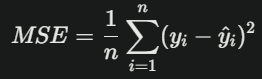


Batch Gradient Descent Update Rule:

θ=θ−η⋅∇J(θ)

- Where:
- - θ: Represents the parameters or weights of the model that you want to optimize.
  - J(θ): Denotes the cost function (or loss function), which measures how well the model is performing given the parameters θ. The goal is to minimize this function.
  - ∇J(θ): Is the gradient of the cost function with respect to the parameters θ. This gradient is a vector that points in the direction of the steepest increase of the cost function.
  - η: Is the learning rate, a small positive scalar that determines the step size taken in the parameter space during each update.

# Creation of Feature/Target/Test Numpy Arrays

Conversion of Data to Numpy Arrays of Training

In [11]:
train_feature_data = train_sp_df_clean[feature_columns]
train_target_data = train_sp_df_clean['performance_index']

train_X = train_feature_data.to_numpy()
train_y = train_target_data.to_numpy()



test_feature_data = test_sp_df_clean[feature_columns]
test_target_data = test_sp_df_clean['performance_index']

test_X = test_feature_data.to_numpy()
test_y = test_target_data.to_numpy()

# Run and Set-up of Batch Gradient Descent with Demo Data to Verify Functionality

In [12]:
# Set-up for learning model
# Example: create random (dummy) data for demo purposes
np.random.seed(42)          # .seed() ensures that the random numbers generated are the same each time the program is run
n_samples = 100
n_features = 5
demo_X = np.random.randn(n_samples, n_features)    # Features matrix
weights_true = np.array([1.5, -2.0, 1.0, 1.5, 2])            # True weights (for testing)
demo_y = demo_X @ weights_true + 0.5             # y = Xw + b, with true bias 0.5

In [13]:
# Verify shape of X
print(demo_X.shape)

(100, 5)


# Gradient Descent Algorithm Function

In [14]:
def g_d_func(X, y, b_init=0.0, learning_rate=0.05, iterations=1000, w_init=None, i_displayed=100):
    # Make sure w matches the number of features
    X = np.asarray(X, dtype=np.float32)               
    y = np.asarray(y, dtype=np.float32)               
    n_features = X.shape[1]

    if w_init is None:
        w = np.zeros(n_features, dtype=np.float32)
    else:
        w = np.asarray(w_init, dtype=np.float32)
        assert w.shape == (n_features,), "w_init length must equal n_features"
    
    # Ensures b is able to move around the horizontal plane
    b = float(b_init)
    cost_history = []

    m = len(y)
    for i in range(iterations):
        y_hat = X.dot(w) + b
        error = y_hat - y

        # Compute gradients
        grad_w = (2 / len(X)) * X.T.dot(error)
        grad_b = (2 / len(X)) * error.sum() # Scalar

        # Update parameters
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

        # Track cost
        mse = (error ** 2).mean()
        cost_history.append(mse)

        if i % i_displayed == 0:
            print(f"Iter {i:5d}: MSE={mse:.4f}")
    
    print("Final Weights:", w)
    print("Final Bias:", b)
    print("Final Cost:", mse)

    return b, w, cost_history

In [15]:
demo_b, demo_w, demo_cost_history = g_d_func(X=demo_X, y=demo_y, learning_rate=0.5, iterations=5, i_displayed=1)

Iter     0: MSE=12.3202
Iter     1: MSE=0.2456
Iter     2: MSE=0.0079
Iter     3: MSE=0.0004
Iter     4: MSE=0.0000
Final Weights: [ 1.4979196 -2.0006971  1.000786   1.4995387  2.0000262]
Final Bias: 0.50029844
Final Cost: 3.7568658e-05


Final Demo Output:

- 'g_d_func' Call
  - "demo_w, demo_b, demo_total_cost = g_d_func(X=demo_X, y=demo_y, learning_rate=0.5, iterations=5, i_displayed=1)"
- Final Iteration
  - Iter 4
- Final Weights
  - 1.4979196
  - -2.0006971
  - 1.000786
  - 1.4995387
  - 2.0000262
- Final Bias
  - 0.50029844
- Final Cost
  - 3.7568658e-05

After fine tuning the learning rate and number of iterations, it appears 5 iterations and a learning rate of 0.5 are appropriate for the training data. 

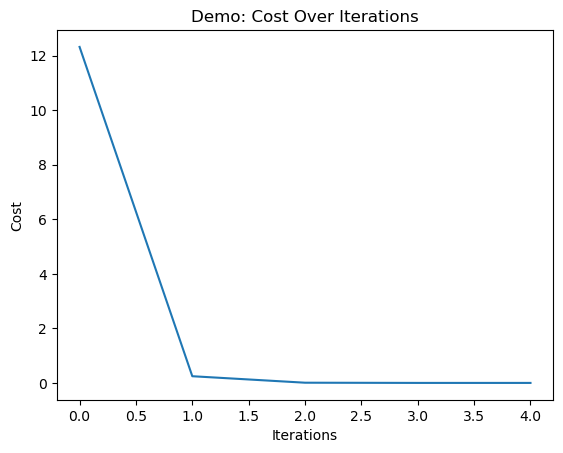

In [31]:
sns.lineplot(demo_cost_history)
plt.title('Demo: Cost Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
plt.close()

In [17]:
# Generation of Key Algorithm Performance Metrics
rmse_mae_r2(demo_X, demo_b, demo_w, demo_y)

 RMSE 0.0020 | MAE 0.0016 | R² 1.0000


Explaination of Performance Metric Meaning

- RMSE (Root Mean Squared Error)
  - 0.0020
    - Meaning
      - RMSE of 0.0020 shows low predictive error relative to the scale of the training set's outputs.
      - This is a sign of algorithmic health.
- MAE (Mean Absolute Error)
  - 0.0016
    - Meaning
      - MAE of 0.0016 shows low error in a metric that is not easily affected by outliers.
      - This is a sign of algorithmic health.
- R² (Coefficient of Determination)
  - 1.0000
    - Meaning
      - R² of 1.0000 means that the algorithm has a perfect fit with actual data (expected in a demo with simulated linear data).
      - This is a sign of algorithmic health.

Multi-Variate Gradient Descent functionality has been verified with demo data. 

# Train Based Off Training Data

In [18]:
train_b, train_w, train_cost_history = g_d_func(X=train_X, y=train_y, b_init=19.2, learning_rate=0.699, iterations=60, i_displayed=10)

Iter     0: MSE=1663.8129
Iter    10: MSE=25.5741
Iter    20: MSE=4.4986
Iter    30: MSE=4.1345
Iter    40: MSE=4.1282
Iter    50: MSE=4.1281
Final Weights: [ 7.38335    17.655712    0.80413145  0.5488109   0.63122207]
Final Bias: 54.897797
Final Cost: 4.1280546


Final Training Output:

- 'g_d_func' Call
  - "train_b, train_w, train_total_cost = g_d_func(X=train_X, y=train_y, b_init=19.2, learning_rate=0.699, iterations=60, i_displayed=10)"
- Final Iteration
  - Iter 60
- Final Weights
  - 7.38335
  - 17.655712
  - 0.80413145
  - 0.5488109
  - 0.63122207
- Final Bias
  - 54.897797
- Final Cost
  - 4.1280546

# Visual Graph of Training Cost

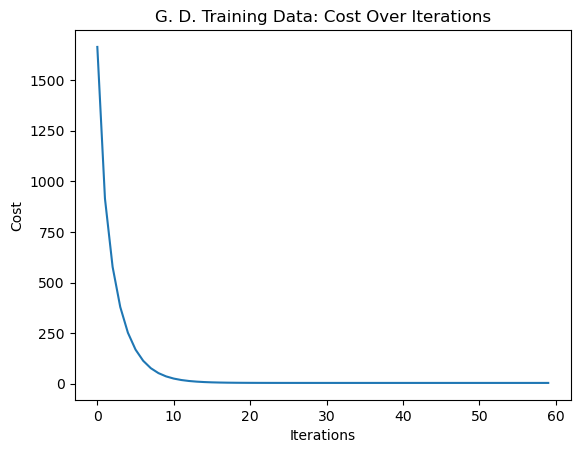

In [30]:
sns.lineplot(train_cost_history)
plt.title('G. D. Training Data: Cost Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
plt.close()

# Predict Test Data with 'train_b' and 'train_w'

In [20]:
# Generation of Key Algorithm Performance Metrics
rmse_mae_r2(test_X, train_b, train_w, test_y)

 RMSE 2.0609 | MAE 1.6328 | R² 0.9884


Standard deviation (std) of target variable:
- 19.2

Relative RMSE = RMSE / (std of target variable)
- 0.1073

Explaination of Performance Metric Meaning

- RMSE (Root Mean Squared Error)
  - 2.0609
    - Meaning
      - RMSE of 2.0609 indicates low predictive error relative to the scale of the training set's outputs.
      - This is a sign of algorithmic health.
- MAE (Mean Absolute Error)
  - 1.6328
    - Meaning
      - MAE of 1.6328 indicates low error in a metric that is not easily affected by outliers.
      - This is a sign of algorithmic health.
- R² (Coefficient of Determination)
  - 0.9884
    - Meaning
      - R² of 0.9884 indicates that the algorithm explains 98.84% of variance with test data.
      - This is a sign of algorithmic health.
- Relative RMSE
  - 0.1073
    - Meaning
      - Relative RMSE of 0.1073 indicates that 'g_d_func' has an average error of roughly 10% of the range of the target variable values.
      - This is a sign of algorithmic health.

# LASSO Regression from scratch adaptation (Cost Function)

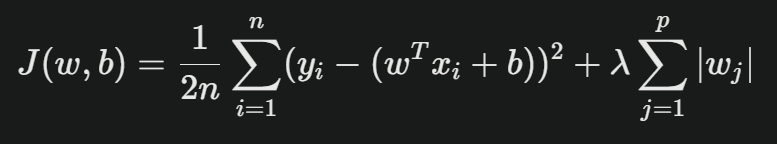

(AKA: L1-regularized least squares cost function)

Where
- b = bias
- lambda = regularization strength

In [21]:
def lasso_g_d_func(X, y, learning_rate=0.01, b_init=0.0, lambda_=0.1, iterations=1000):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * .000005
    cost_history = []
    b = b_init
    
    for i_1 in range(iterations):
        y_hat = X.dot(w) + b
        residual = y - y_hat

        # Gradients
        dw = (-1/n_samples) * X.T.dot(residual) + lambda_ * np.sign(w)
        db = (-1/n_samples) * np.sum(residual)

        # Update rules
        w -= learning_rate * dw
        b -= learning_rate * db

        # Calculate cost
        cost = (1 / (2 * n_samples) * np.sum(residual ** 2) + lambda_ * np.sum(np.abs(w)))
        cost_history.append(cost)
        
        # Print progress every 10 iterations
        if i_1 % 10 == 0:
            print(f"Iteration: {i_1}: Cost={cost:.4f}")
    
    print("Final Weights:", w)
    print("Final Bias:", b)
    print("Final Cost:", cost)

    return b, w, cost_history

In [33]:
# Calling lasso_batch_gradient_descent with training data
lasso_train_b, lasso_train_w, lasso_train_cost_history = lasso_g_d_func( \
    train_X, train_y, learning_rate=0.999999999, b_init=19.2, lambda_=.00000000095, iterations=50)

Iteration: 0: Cost=831.9066
Iteration: 10: Cost=2.5033
Iteration: 20: Cost=2.0702
Iteration: 30: Cost=2.0641
Iteration: 40: Cost=2.0640
Final Weights: [ 7.38334735 17.6557113   0.80413009  0.54880742  0.63166307]
Final Bias: 54.89771603814897
Final Cost: 2.0640273598870476


Final LASSO Training Output:

- 'g_d_lasso' Call
  - "train_b_lasso, train_w_lasso, train_cost_history_lasso = g_d_lasso(
    train_X, train_y, learning_rate=0.999999999, b_init=19.2, lambda_=.00000000095, iterations=50)"
- Final Iteration
  - Iter 50
- Final Weights
  - 7.38334735
  - 17.6557113
  - 0.80413009
  - 0.54880742
  - 0.63166307
- Final Bias
  - 54.89771603806829
- Final Cost
  - 2.0640273598870666

# Visual Graph of LASSO Training Cost

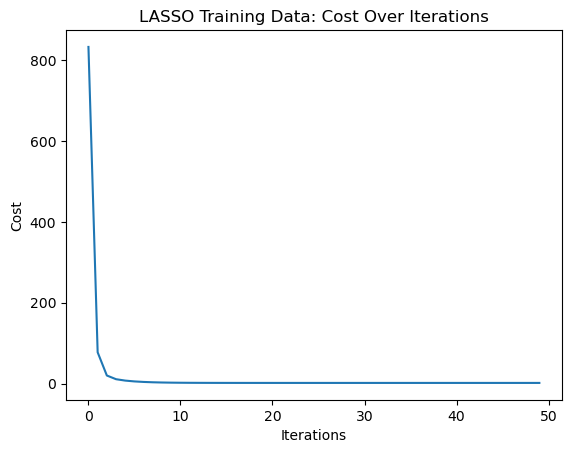

In [29]:
sns.lineplot(lasso_train_cost_history)
plt.title('LASSO Training Data: Cost Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
plt.close()

In [24]:
# Generation of Key Algorithm Performance Metrics
rmse_mae_r2(test_X, lasso_train_b, lasso_train_w, test_y)

 RMSE 2.0609 | MAE 1.6328 | R² 0.9884


Standard deviation (std) of target variable:
- 19.2

Relative RMSE = RMSE / (std of target variable)
- 0.1073

Explaination of Performance Metric Meaning

- RMSE (Root Mean Squared Error)
  - 2.0609
    - Meaning
      - RMSE of 2.0609 indicates low predictive error relative to the scale of the training set's outputs.
      - This is a sign of algorithmic health.
- MAE (Mean Absolute Error)
  - 1.6328
    - Meaning
      - MAE of 1.6328 indicates low error in a metric that is not easily affected by outliers.
      - This is a sign of algorithmic health.
- R² (Coefficient of Determination)
  - 0.9884
    - Meaning
      - R² of 0.9884 indicates that the algorithm explains 98.88% of variance with test data.
      - This is a sign of algorithmic health.
- Relative RMSE
  - 0.1073
    - Meaning
      - Relative RMSE of 0.1073 indicates that 'lasso_g_d_func' has an average error of roughly 10% of the range of the target variable values.
      - This is a sign of algorithmic health.

# Graphing of Prediction Residuals

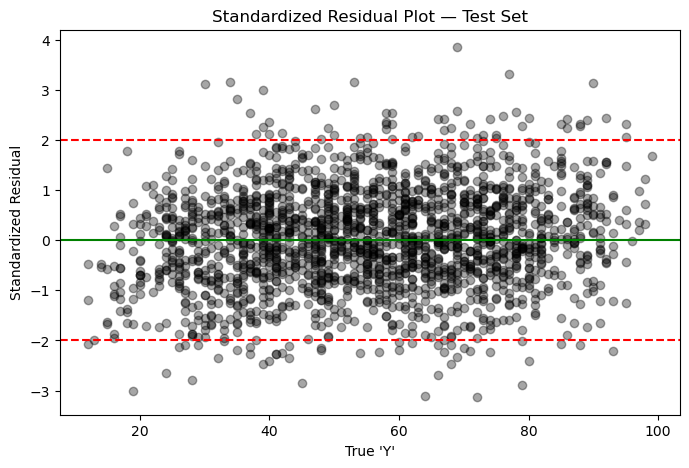

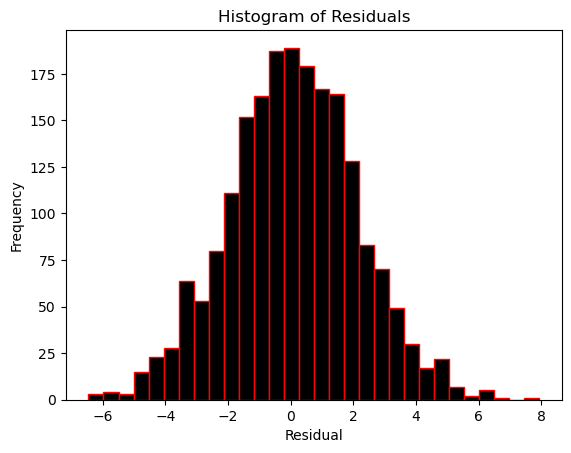

In [26]:
# Residual Calculation
y_hat = predict(test_X, lasso_train_b, lasso_train_w)
residuals = test_y - y_hat
std_residual = residuals / np.std(residuals)

# Scatter Plot Creation
plt.figure(figsize=(8, 5))
plt.scatter(test_y, std_residual, alpha=0.35, color="black")
plt.axhline(0, color="green")
plt.axhline(2, color="red", linestyle="--")
plt.axhline(-2, color="red", linestyle="--")
plt.xlabel("True 'Y'")
plt.ylabel("Standardized Residual")
plt.title("Standardized Residual Plot — Test Set")
plt.show()
plt.close()

# Histogram Creation
plt.hist(residuals, bins=30, edgecolor="red", color="black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
plt.close()

# Explanation of Residual Graphs
- Standardized Residual Plot (Scatter Plot)
  - Lacks heteroscedasticity (contains no patterns)
    - Suggests that the errors of the model are random and not part of a systematic failure
- Histogram of Residuals
  - Has a clear normal distribution (no skew)
  - Errors are mostly small and evenly distributed
- Both graphs appear to be representative of healthy residuals 

# Feature Columns with the Greatest Impact
- previous_scores
- sleep_hours
- hours_studied

After excluding each feature column one-by-one, I have found that the best outcome from both my Multi_Variate Batch Gradeint Descent algorithm and my LASSO Regression algorithm to be when all features from the feature column are included.

# Project Status: Success

This project has succeeded. 

The implementations of both Multi-Variate Batch Gradient Descent and LASSO Regression have both met desired metrics. 

In the future, I plan on demonstrating my knowledge of SciKit-Learn and other machine learning algorithms. 